In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#define partition function and theoretical predictions
def Z(T):
    return 2*np.exp(8/T) + 12 + np.exp(-8/T)
def e(T):
    return (4/Z(T))*(np.exp(-8/T)-np.exp(8/T))
def m(T):
    return (2/Z(T))*(np.exp(8/T)+2)
def e2(T):
    return (8/Z(T))*(np.exp(8/T) + np.exp(-8/T))
def m2(T):
    return (2/Z(T))*(np.exp(8/T) + 1)
def chi(T):
    return 4*(1/(T))*(m2(T)-(m(T))**2)
def CV(T):
    return 4*(1/(T**2))*(e2(T)-(e(T))**2)
#define also a function that plots predictions against numerical results
#plots also difference between them in log scale
def my_plot(data, quantityname, index, units, theo=0, export=0):
    labelleg = 'numerical estimate of' + quantityname
    ylabelname = quantityname + "  (" + units + ")"
    plt.figure()
    plt.plot(data[:,0], data[:,index], label='numerical estimate')
    if theo!=0:
        xline = np.array([data[0,0], data[-1,0]])
        yline = theo*np.ones((2,));
        plt.plot(xline, yline, linestyle='dashed', label="theoretical prediction")  
        sigma = np.std(data[:,index])
        meanv = np.mean(data[:,index])
        plt.ylim(meanv-6*sigma, meanv+6*sigma)
    plt.xlabel('number of MC cycles', fontsize=13)
    plt.ylabel(ylabelname, fontsize=12)
    plt.grid()
    plt.legend(fontsize=14)
    plt.xticks(np.arange(0,500000,100000), fontsize=11)
    if export:
        plt.savefig("2x2"+quantityname+".pdf", dpi=600, bbox_inches='tight')
    plt.show()
    
    

Theoreticals
-1.995982198020181 0.9986607888279513 0.032081438799243855 0.004010515724450325
NUmericals
-1.996035 0.99870125 0.031657036 0.0038207435


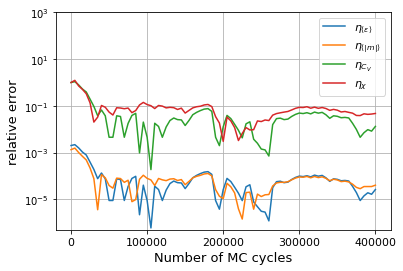

In [39]:
#plot data from simulation for 2x2 case and compare with analytical results
filename = "LatticeData_2_1.0_D.csv"#name of the file containing data
data_in = pd.read_csv(filename)
numdata = data_in.to_numpy()
T=1;
#expo=0#if you want to export set this to 1
#my_plot(numdata,  '$\\langle \\epsilon \\rangle$', 1, 'J/spin',e(T),expo)
#my_plot(numdata, 'numerical estimate of $\\langle \\vert m \\vert \\rangle$', 2,'1/spin', m(T),expo)
#my_plot(numdata, 'specific heat', 3,'$k_B$/spin', CV(T),1)
#my_plot(numdata, 'susceptibility', 4, 'spin/J', chi(T),1)
##compare with theoretical prediction
#print("expected value for energy: ", e(T))
#print("expected value for magnetization: ", m(T))
#print("expected value for sp. heat: ", CV(T))
#print("expected value for susceptibility: ", chi(T))
re = [];
rm = [];
rCV = [];
rchi = [];
Nc = [];
print("Theoreticals")
print(e(T), m(T), CV(T), chi(T))
print("NUmericals")
print(numdata[-1,1], numdata[-1,2],numdata[-1,3], numdata[-1,4])
for kk in np.arange(0, 405000, 5000):
    re.append(np.abs(((e(T)-numdata[kk,1])/(e(T))))  )
    rm.append(np.abs(((m(T)-numdata[kk,2])/(m(T))))  )
    rCV.append(np.abs(((CV(T)-numdata[kk,3])/(CV(T)))) )
    rchi.append(np.abs(((chi(T)-numdata[kk,4])/(chi(T)))) ) 
    Nc.append(kk)
    #strprint = str(kk) + "  & " + "{:.2f}".format(re) + "\% & " + "{:.2f}".format(rm) + "\% & "+ "{:.2f}".format(rCV) + \
    #"\% & " + "{:.2f}".format(rchi) + "\% \\\\"
    #print(strprint)

plt.figure()
plt.plot(Nc, re, label="$\\eta_{\\langle\\epsilon\\rangle}$")
plt.plot(Nc, rm, label="$\\eta_{\\langle\\vert m\\vert \\rangle}$")
plt.plot(Nc, rCV, label="$\\eta_{C_V}$")
plt.plot(Nc, rchi, label="$\\eta_{\chi}$")
plt.legend(fontsize=11, loc='upper right')
plt.grid()
plt.yscale('log')
plt.ylim(0.5e-6, 1e3);
plt.xlabel('Number of MC cycles',fontsize=13)
plt.ylabel('relative error',fontsize=13)
plt.xticks(np.arange(0,500000,100000),fontsize=11)
plt.savefig('rel_err_Ising.pdf', dpi=300, bbox_inches='tight')
plt.show()

Temperature 2.4
Temperature 2.4


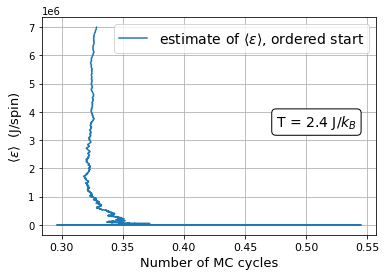

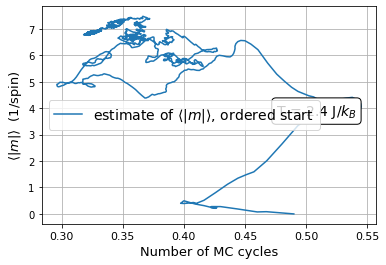

In [6]:
#now plot data from simulations in the case of a 20x20 grid

L = 20;
start_condition = ['ordered start', 'random start']
Npoints = 100000;
quantities = [ "\\epsilon","\\vert m \\vert", "e", "abs_m"]
orders = ['D']
textbox_pos1 = 0.7
textbox_pos2 = [0.5, 0.2]
props = dict(boxstyle='round', facecolor='white', alpha=1.0)
tempindex = 0
a = ['$\\langle \\epsilon \\rangle$  (J/spin)', '$\\langle \\vert m \\vert \\rangle$  (1/spin)']
for T in [2.400]:#loop on temperatures
   
    for q in range(2): #loop on magnetization, epsilon
        print("Temperature", T)
        textstring = "T = " + str(T) + " J/$k_B$"
        plt.figure()
        ax = plt.axes()
        for order in range(1):#loop on ordered, disordered configuration
            filename = "LatticeData_" + str(L) + "_2.400_" + orders[order]+  ".csv"
            data_in = pd.read_csv(filename)
            numdata = data_in.to_numpy()
            plt.plot(numdata[0:Npoints,0], numdata[0:Npoints,q+1], label = "estimate of $\\langle" +\
                     quantities[q] + "\\rangle$, " + start_condition[order])

        #plt.title("Data with T=" + str(T) + "$J/k_B$")
        plt.grid()
        plt.legend(fontsize=14)
        plt.text(textbox_pos1,textbox_pos2[tempindex], textstring, transform=ax.transAxes, fontsize=14, bbox=props )
        plt.xticks(fontsize=11)
        plt.xlabel('Number of MC cycles', fontsize=13)
        plt.ylabel(a[q], fontsize=13)

       # plt.savefig("20x20_" + str(T) + "_" + quantities[q+2] + ".pdf" , dpi=600, bbox_inches="tight")

    tempindex = tempindex+1     
            

In [4]:
str(2.400)

'2.4'